The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


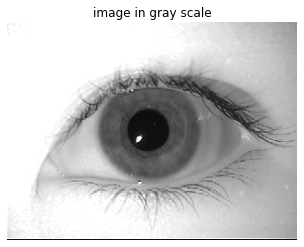

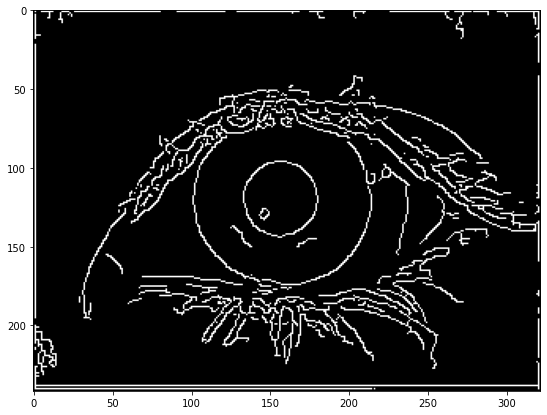

0.125125 179 293 57


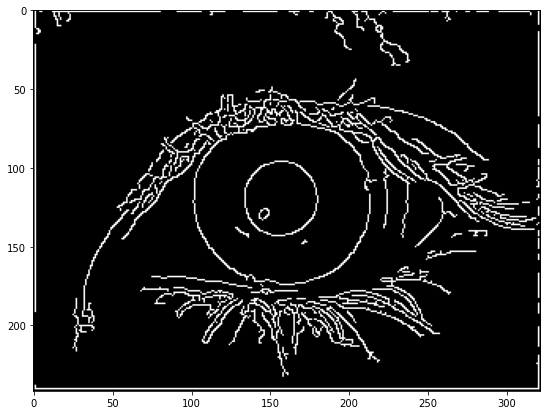

0.20272222222222222 201 217 30


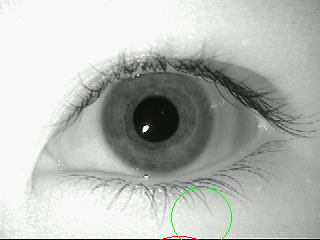

In [16]:
import numpy as np
from PIL import Image, ImageDraw
from math import sqrt, pi, cos, sin
from collections import defaultdict
import cv2
def hought_transform(image,img,inner,rmin,rmax,steps,threshold):
    """
    This function applies the hough transform to an image.
    The function takes as input:
    - image: the image to be transformed
    - rmin: the minimum radius to be considered
    - rmax: the maximum radius to be considered
    - steps: the number of steps between rmin and rmax
    - threshold: the minimum number of votes that a line has to get in order to be considered
    """
    # Output image:
    if not(inner) :
        output_image = Image.new("RGB", Image.open('images/aeval1.bmp').size)
        output_image.paste(Image.open('images/aeval1.bmp'))
    else:
        output_image = Image.new("RGB", Image.open('images/hough_transform.bmp').size)
        output_image.paste(Image.open('images/hough_transform.bmp'))
    draw_result = ImageDraw.Draw(output_image)
    points=[]
    for r in (rmin,rmax+1):
        for t in range(steps):
            points.append((r,int(r*cos(2*pi*t/steps)),int(r*sin(2*pi*t/steps))))
    
    hough_space = defaultdict(int)
    for x, y in image:
        for r, dx, dy in points:
            a = x - dx
            b = y - dy
            hough_space[(a, b, r)] += 1
        circles=[]
    for k, v in sorted(hough_space.items(), key=lambda i: -i[1]):
        x, y, r = k
        if v / steps >= threshold and all((x - xc) * 2 + (y - yc) * 2 > rc ** 2 for xc, yc, rc in circles):
            print(v / steps, x, y, r)
            circles.append((x, y, r))

    for x, y, r in circles:
        if not(inner):
            draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))
        else:
            draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(0,255,0,0))
    output_image.save('images/hough_transform.bmp')
    return output_image


%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import canny_edge_detector as canny
from sobel import show_images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import skimage.io as io
import numpy as np  # linear algebra
from skimage.color import rgba2rgb
from skimage.exposure import rescale_intensity
import os

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
paths=[]
def load_data(dir_name = 'images'):    
    imgs = []
    for filename in os.listdir(dir_name):
        if os.path.isfile(dir_name + '/' + filename):
            img = io.imread(dir_name + '/' + filename)
            img = rgb2gray(img)
            imgs.append(img)
            paths.append(dir_name + '/' + filename)
    return imgs
def visualize(imgs, format=None, gray=False):
    plt.figure(figsize=(20, 40))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(2, 2, plt_idx)
        plt.imshow(img, format)
    plt.show()
# imgs = load_data()
lower = .025
upper = .04
# for img in imgs:
    # v = np.median(img)
img = io.imread('images/aeval1.bmp')
img = rgb2gray(img)
show_images([img], ['image in gray scale'])
    # apply automatic Canny edge detection using the computed median
detector = canny.cannyEdgeDetector([img], sigma=4, kernel_size=5, lowthreshold=lower, highthreshold=upper, weak_pixel=100)
imgs_final,keep = detector.detect()
visualize(imgs_final, 'gray')
hough = hought_transform(keep,'images/aeval1.bmp',False,rmin=57,rmax=64,steps=8000,threshold=.003)
lower = .054
upper = .064
detector = canny.cannyEdgeDetector([img], sigma=1, kernel_size=5, lowthreshold=lower, highthreshold=upper, weak_pixel=100)
imgs_final,keep = detector.detect()
visualize(imgs_final, 'gray')
hought_transform(keep,hough,True,rmin=30,rmax=40,steps=18000,threshold=.06)
